<a href="https://colab.research.google.com/github/shaziaakhan/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing:

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/customer_churn_large_dataset.csv")

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [6]:
df.shape

(100000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [11]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
# gives the total count of missing values present in the each column
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

IT INDICATES THERE ARE NO MISSING VALUES PRESENT IN THE DATASET

In [9]:
df.isnull().sum().sum()

0

In [30]:
Y=df['Churn']
X=df.drop(['Churn','CustomerID','Name','Gender','Location','Age'],axis=1)

##Feature scaling:

<ipython-input-14-9b4d76a18a93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly_Bill'])


<Axes: xlabel='Monthly_Bill', ylabel='Density'>

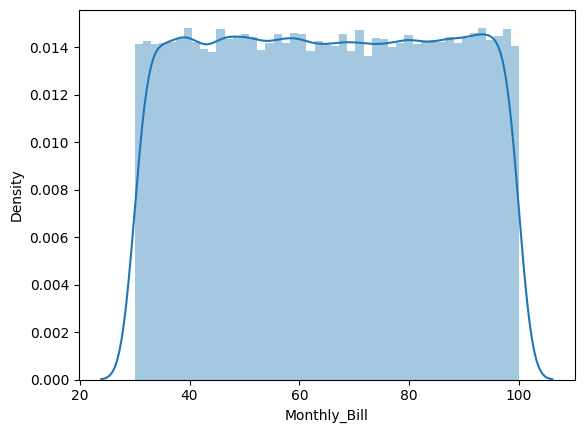

In [14]:
sns.distplot(df['Monthly_Bill'])

Since its not a bell shaped curve, we will perform normalization as a feature scaling method

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(X)
x=scaler.transform(X)

#Model Building:

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.10,random_state=10)

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [46]:
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=lr.predict(x_test)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
lr.predict(x_test.iloc[4].values.reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [27]:
from sklearn.metrics import accuracy_score,classification_report

In [50]:
score=accuracy_score(y_pred,y_test)
score

0.5057

In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.51      0.64      8700
           1       0.13      0.50      0.21      1300

    accuracy                           0.51     10000
   macro avg       0.50      0.50      0.42     10000
weighted avg       0.78      0.51      0.58     10000



# Model Optimization:

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [53]:
model = LogisticRegression(C=1.0, penalty='l2')


In [62]:
from sklearn.model_selection import cross_val_score
k=15
scores = cross_val_score(model, X, Y, cv=k, scoring='accuracy')


In [63]:
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Standard Deviation: {:.2f}".format(scores.std()))


Mean Accuracy: 50.16%
Standard Deviation: 0.00


In [64]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}


In [66]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=k, scoring='accuracy')
grid_search.fit(X, Y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [67]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters: ", best_params)
print("Best Accuracy: {:.2f}%".format(best_score * 100))


Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Best Accuracy: 50.16%


# Model Deployment

In [71]:
import joblib

joblib.dump(best_model, 'Customer_churn_model.pkl')

['Customer_churn_model.pkl']